In [1]:
from math import cos, sin, sqrt, pi
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

## Utility functions
---

In [3]:
def tabularize(f, domain, samples):
    return [(x, f(x)) for x in np.linspace(domain[0], domain[1], samples)]

In [4]:
def approximation_error(f, samples):
    return sum((y - f(x))**2 for x,y in samples)

## Input data
---

In [5]:
def F1(x): return 10 + 0.5 * x**2 - 10 * cos(2*x)
D1 = (-2 * pi, 2 * pi)

def F2(x): return -1 * x * sin(sqrt(3 * abs(x - 1)))
D2 = (-100., 100.)

FUNCTIONS = [(F1, D1), (F2, D2)]

## Least-squares approximation
---

In [6]:
def monomial(x, i):
    return x**i

def trygonometric_monomial(x, i):
    if i == 0: return 1
    return sin(i * x)

def generate_polynomial(coefficients):
    return lambda x: sum(a * monomial(x, i) for (i,a) in enumerate(coefficients))

def generate_trygonometric_polynomial(coefficients):
    return lambda x: sum(a * trygonometric_monomial(x, i) for (i,a) in enumerate(coefficients))

In [7]:
def polynomial_approximation(f, domain, n, m):
    samples = tabularize(f, domain, n)
    
    A = np.matrix([[monomial(samples[i][0], j) for j in range(m)] for i in range(n)])
    B = np.array([samples[i][1] for i in range(n)])
    
    coefficients = np.linalg.inv((A.T).dot(A)).dot(A.T).dot(B)
    
    return generate_polynomial(coefficients.tolist()[0])

In [8]:
def trygonometric_approximation(f, domain, n, m):
    samples = tabularize(f, domain, n)
    
    A = np.matrix([[trygonometric_monomial(samples[i][0], j) for j in range(m)] for i in range(n)])
    B = np.array([samples[i][1] for i in range(n)])
    
    coefficients = np.linalg.inv((A.T).dot(A)).dot(A.T).dot(B)
    
    return generate_trygonometric_polynomial(coefficients.tolist()[0])

## Results (polynomial)
---

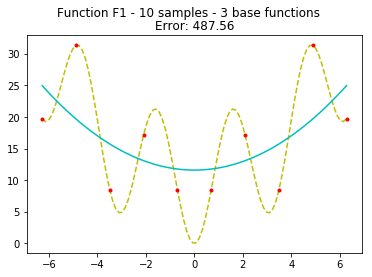

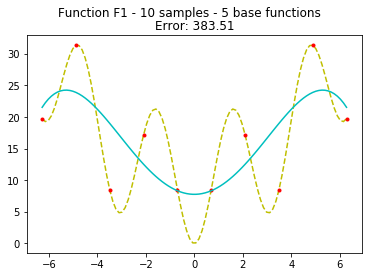

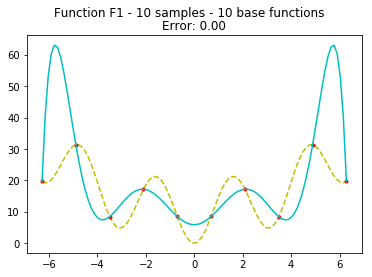

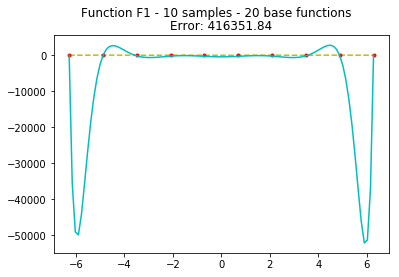

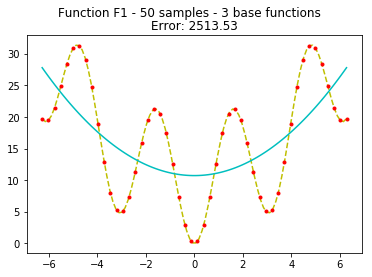

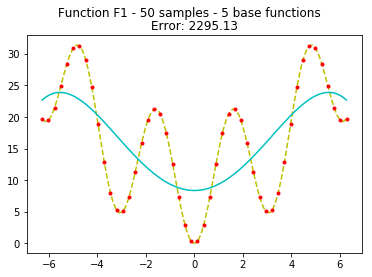

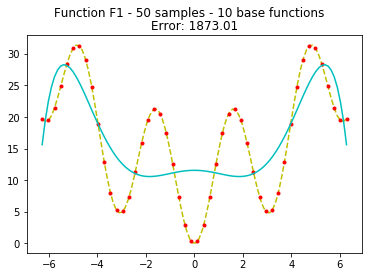

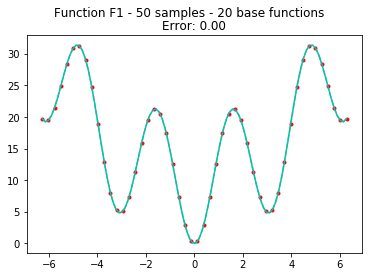

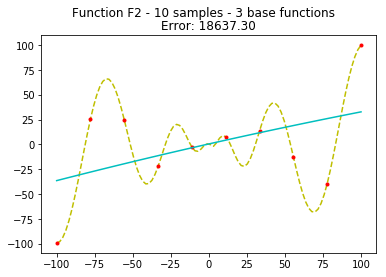

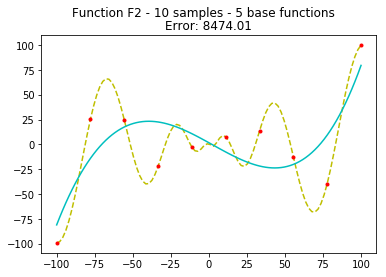

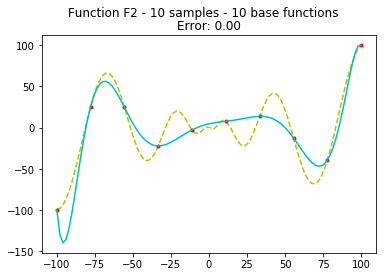

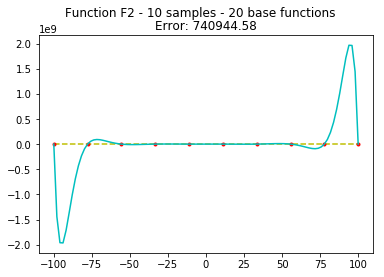

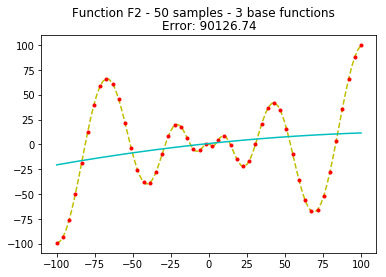

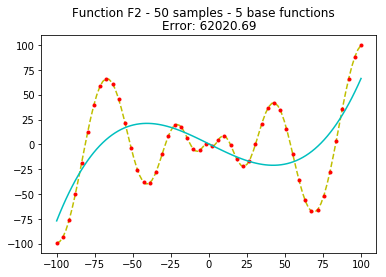

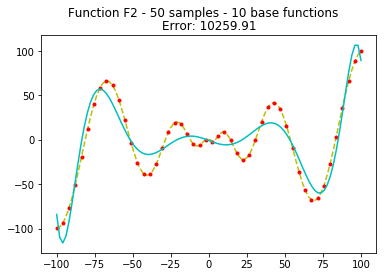

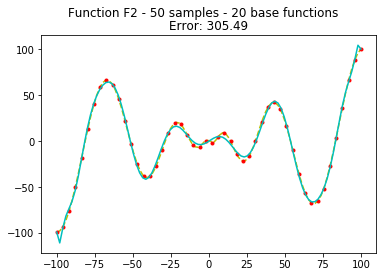

In [9]:
for f,d in FUNCTIONS:
    x = np.linspace(d[0], d[1], 100)
    
    # different configurations
    for n in [10, 50]:
        for m in [3, 5, 10, 20]:
            samples = tabularize(f, d, n)
            approximation = polynomial_approximation(f, d, n, m)
            error = approximation_error(approximation, samples)
            
            # plot configuration
            plt.figure()
            plt.suptitle(f'Function {f.__name__} - {n} samples - {m} base functions')
            plt.title('Error: {:.2f}'.format(error))

            # input function
            plt.plot(x, list(map(f, x)), 'y--')
            plt.plot(*zip(*samples), 'r.')

            # polynomial approximation
            plt.plot(x, list(map(approximation, x)), 'c')

## Results (trygonometric)
---

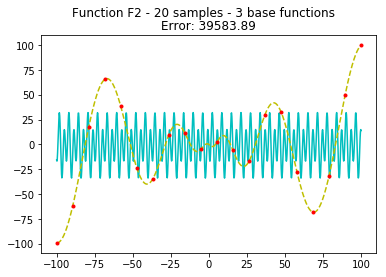

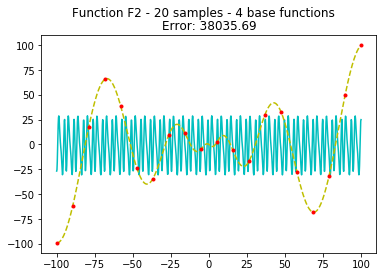

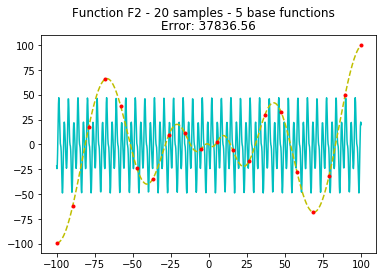

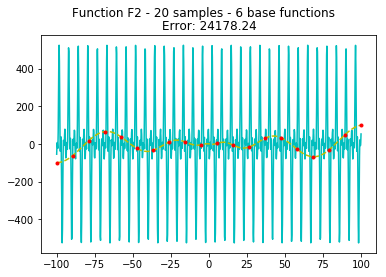

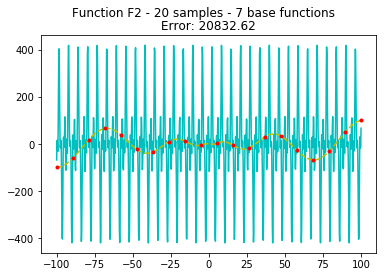

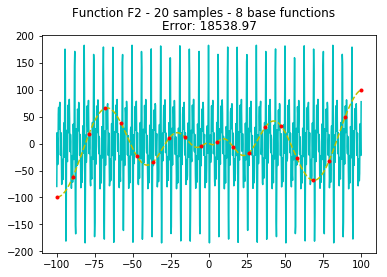

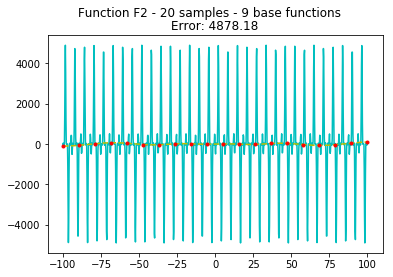

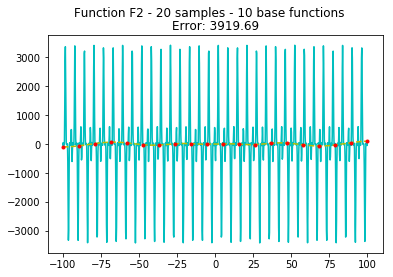

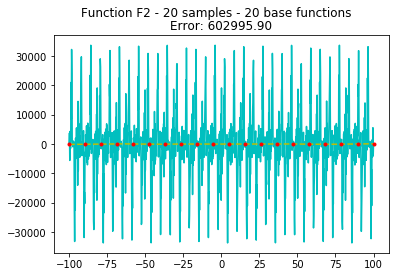

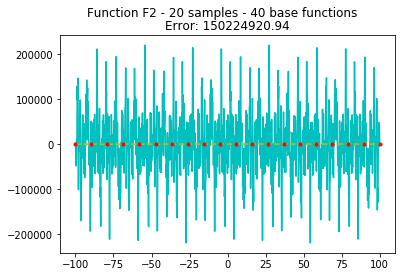

In [10]:
for f,d in FUNCTIONS[1:]:
    x = np.linspace(d[0], d[1], 1000)
    
    # different configurations
    for n in [20]:
        for m in [3, 4, 5, 6, 7, 8, 9, 10, 20, 40]:
            samples = tabularize(f, d, n)
            approximation = trygonometric_approximation(f, d, n, m)
            error = approximation_error(approximation, samples)
            
            # plot configuration
            plt.figure()
            plt.suptitle(f'Function {f.__name__} - {n} samples - {m} base functions')
            plt.title('Error: {:.2f}'.format(error))

            # trygonometric approximation
            plt.plot(x, list(map(approximation, x)), 'c')

            # input function
            plt.plot(x, list(map(f, x)), 'y--')
            plt.plot(*zip(*samples), 'r.')